In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("rainfall in india 1901-2015.csv")

In [3]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [4]:
df.head()

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8

In [5]:
data1 = df.groupby(['SUBDIVISION'])[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'NOV', 'DEC']]

In [6]:
df.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [7]:
data=data1.get_group(('TAMIL NADU'))
data.head()

YEAR   JAN   FEB   MAR   APR    MAY   JUN   JUL    AUG    SEP    NOV  \
3427  1901  24.5  39.1  21.7  36.0   74.0  41.8  49.3   67.9  191.1  212.3   
3428  1902  67.2   9.8  25.1  21.9   84.7  39.3  55.1  113.8   98.6  174.9   
3429  1903  19.3   7.8   1.7  18.2  128.5  58.5  72.6  115.0  210.4  200.5   
3430  1904  35.2   0.1   0.7  19.5  121.9  34.9  89.0   40.4   85.7   23.6   
3431  1905   6.5   7.5  17.2  64.8   83.7  49.8  39.0  101.8   73.5  123.7   

        DEC  
3427   80.4  
3428  165.8  
3429  203.2  
3430   49.1  
3431    3.2

In [8]:
data.set_index('YEAR', inplace = True)
data.head()

JAN   FEB   MAR   APR    MAY   JUN   JUL    AUG    SEP    NOV    DEC
YEAR                                                                       
1901  24.5  39.1  21.7  36.0   74.0  41.8  49.3   67.9  191.1  212.3   80.4
1902  67.2   9.8  25.1  21.9   84.7  39.3  55.1  113.8   98.6  174.9  165.8
1903  19.3   7.8   1.7  18.2  128.5  58.5  72.6  115.0  210.4  200.5  203.2
1904  35.2   0.1   0.7  19.5  121.9  34.9  89.0   40.4   85.7   23.6   49.1
1905   6.5   7.5  17.2  64.8   83.7  49.8  39.0  101.8   73.5  123.7    3.2

In [9]:
data.shape

(115, 11)

In [10]:
data_np = data.to_numpy()
dates = pd.date_range(start='1901-01', freq='MS', periods=data_np.size)

data_np = data_np.reshape(-1, 1)
df = pd.DataFrame({'Mean': data_np.flatten()})
df.set_index(dates, inplace=True)
df.head()

Mean
1901-01-01  24.5
1901-02-01  39.1
1901-03-01  21.7
1901-04-01  36.0
1901-05-01  74.0

Text(0, 0.5, 'Rainfall Mean across Month')

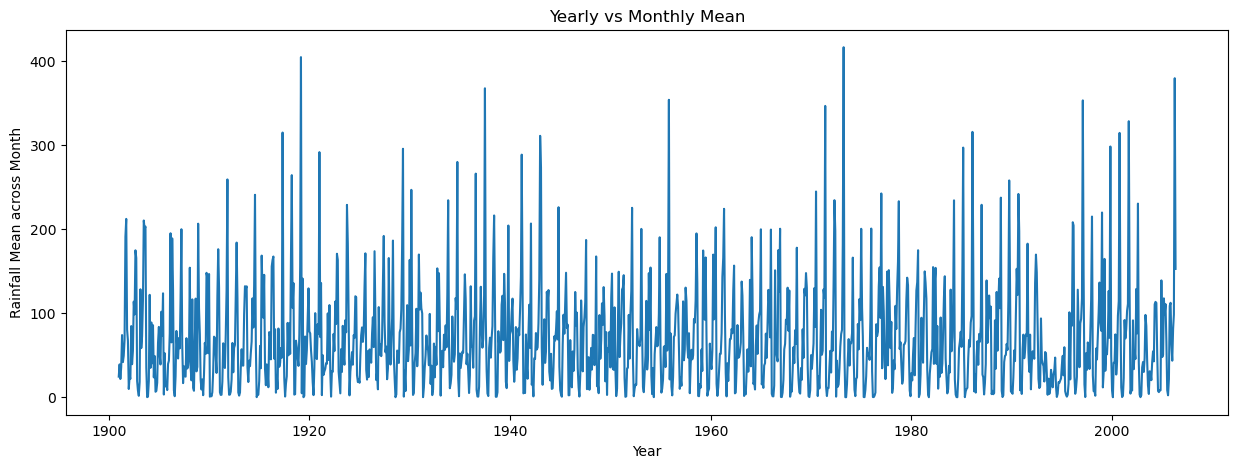

In [17]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Rainfall Mean across Month')

In [11]:
dataset = df.values
dataset.shape

(1265, 1)

In [12]:
train = dataset[0:1000,:]
test = dataset[1000:,:]

In [13]:
train.shape,test.shape

((1000, 1), (265, 1))

In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(1265, 1)

In [16]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(940, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [19]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 2, verbose = 2)


Epoch 1/10

470/470 - 12s - loss: 0.0207 - 12s/epoch - 25ms/step
Epoch 2/10
470/470 - 9s - loss: 0.0162 - 9s/epoch - 18ms/step
Epoch 3/10
470/470 - 9s - loss: 0.0159 - 9s/epoch - 18ms/step
Epoch 4/10
470/470 - 9s - loss: 0.0152 - 9s/epoch - 18ms/step
Epoch 5/10
470/470 - 9s - loss: 0.0146 - 9s/epoch - 18ms/step
Epoch 6/10
470/470 - 9s - loss: 0.0138 - 9s/epoch - 18ms/step
Epoch 7/10
470/470 - 8s - loss: 0.0142 - 8s/epoch - 18ms/step
Epoch 8/10
470/470 - 8s - loss: 0.0142 - 8s/epoch - 18ms/step
Epoch 9/10
470/470 - 8s - loss: 0.0135 - 8s/epoch - 18ms/step
Epoch 10/10
470/470 - 9s - loss: 0.0139 - 9s/epoch - 19ms/step


In [20]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [21]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [22]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

9/9 [==============================] - 1s 11ms/step


In [23]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

56.26286169935415

In [24]:
df.tail(12)

Mean
2005-06-01   66.0
2005-07-01    8.3
2005-08-01    2.3
2005-09-01   21.7
2005-10-01  108.8
2005-11-01  112.4
2005-12-01   62.4
2006-01-01   43.5
2006-02-01   81.6
2006-03-01   98.4
2006-04-01  379.8
2006-05-01  152.8

In [25]:
trainpred = model.predict(X_test,steps=2)

2/2 [==============================] - 0s 24ms/step


In [26]:
pred = scaler.inverse_transform(trainpred)

In [27]:
date_ind = pd.date_range(start = '2006-05-01', freq = 'MS', end = '2028-5-1')

In [28]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})

In [29]:
new_df.set_index(date_ind, inplace = True)

In [30]:
new_df

Predicted_values
2006-05-01         86.481636
2006-06-01         34.679745
2006-07-01         22.760286
2006-08-01         31.291216
2006-09-01         40.891487
...                      ...
2028-01-01         91.464867
2028-02-01        104.803200
2028-03-01        106.330864
2028-04-01         90.836571
2028-05-01         78.164619

[265 rows x 1 columns]

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def predict_rainfall_with_year_month(model, scaler, year, month):
    
    max_year = 2050  
    min_year = 2006 
    
    year_norm = (year - min_year) / (max_year - min_year)  
    month_norm = month / 12  
    
    input_sequence = np.array([year_norm, month_norm]).reshape(1, 2, 1)
    predicted_scaled = model.predict(input_sequence)
    predicted_value = scaler.inverse_transform(predicted_scaled)[0][0]
    print(f"Predicted rainfall for {year}-{month:02}: {predicted_value}")
    return predicted_value

In [45]:
predicted_rainfall = predict_rainfall_with_year_month(model, scaler, 2018, 1)

1/1 [==============================] - 0s 313ms/step
Predicted rainfall for 2018-01: 63.3929328918457


In [38]:
model.save('rain_model.keras')

In [39]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
print(model.input_shape) 

(None, 60, 1)


In [43]:
last_60_data = df.tail(60)
last_60_data.to_csv('last_60_rainfall_data.csv')